In [81]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt 


In [11]:
cpt_df = pd.read_csv(parent_dir + 'MRKR_CPT.csv')
demographics_df = pd.read_csv(parent_dir + 'MRKR_demographics.csv')
icd_df = pd.read_csv(parent_dir + 'MRKR_ICD.csv')
image_df = pd.read_csv(parent_dir + 'MRKR_image_metadata.csv')
pain_df = pd.read_csv(parent_dir + 'MRKR_pain.csv')

In [33]:
pain_df.shape

(4970869, 6)

In [35]:
print("patients: " + str(image_df.empi_anon.nunique()))
print("studies: " + str(image_df.StudyInstanceUID_anon.nunique()))
print("images: " + str(image_df.shape[0]))

patients: 83011
studies: 169004
images: 503261


In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 

# set width of bar 
barWidth = 0.33
fig = plt.subplots(figsize =(14, 6)) 

# set height of bar 
Black = [0.25, 0.07, 0.35, 0.20, 0.13] 
White = [0.30, 0.06, 0.36, 0.18, 0.10] 

# Set position of bar on X axis 
br1 = np.arange(len(White)) 
br2 = [x + barWidth for x in br1] 

# Make the plot
plt.bar(br1, White, color ='tab:blue', width = barWidth, 
		edgecolor ='grey', label ='White') 
plt.bar(br2, Black, color ='tab:orange', width = barWidth, 
		edgecolor ='grey', label ='Black') 

# Adding Xticks 
plt.xlabel('KLG Severity', fontsize = 12) 
plt.ylabel('KLG Entries', fontsize = 12) 
plt.xticks([r + barWidth for r in range(len(Black))], 
		['0', '1', '2', '3', '4'])

plt.title("KLG Distribution by Race")


plt.legend()
plt.show() 


In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 

# set width of bar 
barWidth = 0.25
fig = plt.subplots(figsize =(18, 6)) 

# set height of bar 
Black = [0.087, 0.043, 0.079, 0.099, 0.108, 0.137, 0.101, 0.104, 0.11, 0.049, 0.082]
White = [0.117, 0.061, 0.119, 0.135, 0.139, 0.133, 0.085, 0.071, 0.073, 0.026, 0.04]
Other = [0.079, 0.055, 0.111, 0.12, 0.142, 0.141, 0.101, 0.087, 0.095, 0.034, 0.035]
# Set position of bar on X axis 
br1 = np.arange(len(White)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 

# Make the plot
plt.bar(br1, White, color ='tab:blue', width = barWidth, edgecolor ='grey', label ='White') 
plt.bar(br2, Other, color ='tab:green', width = barWidth, edgecolor ='grey', label ='Other')
plt.bar(br3, Black, color ='tab:orange', width = barWidth, edgecolor ='grey', label ='Black') 

# Adding Xticks 
plt.xlabel('Pain Severity', fontsize = 12) 
plt.ylabel('Pain Entries', fontsize = 12) 
plt.xticks([r + barWidth for r in range(len(Black))], 
		['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

plt.title("Pain Distribution\nof Patients with Arthroplasty by Race")


plt.legend()
plt.show() 


In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 

# set width of bar 
barWidth = 0.25
fig = plt.subplots(figsize =(18, 6)) 

# set height of bar 
Black = [0.049, 0.024, 0.058, 0.078, 0.102, 0.135, 0.107, 0.125, 0.151, 0.065, 0.106]
White = [0.076, 0.056, 0.109, 0.13, 0.147, 0.146, 0.096, 0.091, 0.086, 0.031, 0.033]
Other = [0.094, 0.053, 0.092, 0.109, 0.125, 0.145, 0.098, 0.099, 0.102, 0.037, 0.045]
# Set position of bar on X axis 
br1 = np.arange(len(White)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 

# Make the plot
plt.bar(br1, White, color ='tab:blue', width = barWidth, edgecolor ='grey', label ='White') 
plt.bar(br2, Other, color ='tab:green', width = barWidth, edgecolor ='grey', label ='Other')
plt.bar(br3, Black, color ='tab:orange', width = barWidth, edgecolor ='grey', label ='Black') 

# Adding Xticks 
plt.xlabel('Pain Severity', fontsize = 12) 
plt.ylabel('Pain Entries', fontsize = 12) 
plt.xticks([r + barWidth for r in range(len(Black))], 
		['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

plt.title("Pain Distribution\nof Patients without Arthroplasty by Race")


plt.legend()
plt.show() 


In [43]:
image_df['date'] = image_df.StudyDate_anon.str.split(" ").str[0]

In [44]:
image_df['id_date'] = image_df['empi_anon'].astype(str) + "_" + image_df['date'].astype(str)

In [42]:
pain_df['id_date'] = pain_df['empi_anon'].astype(str) + "_" + pain_df['date_anon'].str.split(" ").str[0].astype(str)

In [45]:
new_df = pd.merge(pain_df, image_df[['id_date','empi_anon','L_KLG_inference','R_KLG_inference', 'age_at_exam', 'weight_bearing', 'arthroplasty', 'StudyInstanceUID_anon','laterality']], on=['id_date','empi_anon'], how="left")


In [46]:
new_df = new_df.dropna(subset=['StudyInstanceUID_anon'])

(5397763, 14)

In [48]:
columns_to_check = ['L_KLG_inference', 'R_KLG_inference']

new_df = new_df.dropna(subset=columns_to_check, how='all')

In [50]:
black_patients = sorted(demographics_df[demographics_df.race=="African American or Black"].empi_anon.tolist())
white_patients = sorted(demographics_df[demographics_df.race=="Caucasian or White"].empi_anon.tolist())
other_patients = sorted(demographics_df[~demographics_df.race.isin(['Caucasian or White', 'Black or African American'])].empi_anon.tolist())


In [67]:
black_klg0_left = new_df[(new_df.weight_bearing==1) & (new_df.empi_anon.isin(black_patients)) & ((new_df.L_KLG_inference==0) & (new_df.laterality_x.isin(['L','B'])))].drop_duplicates('StudyInstanceUID_anon')
black_klg0_right = new_df[(new_df.weight_bearing==1) & (new_df.empi_anon.isin(black_patients)) & ((new_df.R_KLG_inference==0) & (new_df.laterality_x.isin(['R','B'])))].drop_duplicates('StudyInstanceUID_anon')
black_klg0 = pd.concat([black_klg0_left, black_klg0_right]).reset_index(drop=True)

black_klg1_left = new_df[(new_df.weight_bearing==1) & (new_df.empi_anon.isin(black_patients)) & ((new_df.L_KLG_inference==1) & (new_df.laterality_x.isin(['L','B'])))].drop_duplicates('StudyInstanceUID_anon')
black_klg1_right = new_df[(new_df.weight_bearing==1) & (new_df.empi_anon.isin(black_patients)) & ((new_df.R_KLG_inference==1) & (new_df.laterality_x.isin(['R','B'])))].drop_duplicates('StudyInstanceUID_anon')
black_klg1 = pd.concat([black_klg1_left, black_klg1_right]).reset_index(drop=True)

black_klg2_left = new_df[(new_df.weight_bearing==1) & (new_df.empi_anon.isin(black_patients)) & ((new_df.L_KLG_inference==2) & (new_df.laterality_x.isin(['L','B'])))].drop_duplicates('StudyInstanceUID_anon')
black_klg2_right = new_df[(new_df.weight_bearing==1) & (new_df.empi_anon.isin(black_patients)) & ((new_df.R_KLG_inference==2) & (new_df.laterality_x.isin(['R','B'])))].drop_duplicates('StudyInstanceUID_anon')
black_klg2 = pd.concat([black_klg2_left, black_klg2_right]).reset_index(drop=True)

black_klg3_left = new_df[(new_df.weight_bearing==1) & (new_df.empi_anon.isin(black_patients)) & ((new_df.L_KLG_inference==3) & (new_df.laterality_x.isin(['L','B'])))].drop_duplicates('StudyInstanceUID_anon')
black_klg3_right = new_df[(new_df.weight_bearing==1) & (new_df.empi_anon.isin(black_patients)) & ((new_df.R_KLG_inference==3) & (new_df.laterality_x.isin(['R','B'])))].drop_duplicates('StudyInstanceUID_anon')
black_klg3 = pd.concat([black_klg3_left, black_klg3_right]).reset_index(drop=True)


black_klg4_left = new_df[(new_df.weight_bearing==1) & (new_df.empi_anon.isin(black_patients)) & ((new_df.L_KLG_inference==4) & (new_df.laterality_x.isin(['L','B'])))].drop_duplicates('StudyInstanceUID_anon')
black_klg4_right = new_df[(new_df.weight_bearing==1) & (new_df.empi_anon.isin(black_patients)) & ((new_df.R_KLG_inference==4) & (new_df.laterality_x.isin(['R','B'])))].drop_duplicates('StudyInstanceUID_anon')
black_klg4 = pd.concat([black_klg4_left, black_klg4_right]).reset_index(drop=True)


In [68]:
white_klg0_left = new_df[(new_df.weight_bearing==1) & (new_df.empi_anon.isin(white_patients)) & ((new_df.L_KLG_inference==0) & (new_df.laterality_x.isin(['L','B'])))].drop_duplicates('StudyInstanceUID_anon')
white_klg0_right = new_df[(new_df.weight_bearing==1) & (new_df.empi_anon.isin(white_patients)) & ((new_df.R_KLG_inference==0) & (new_df.laterality_x.isin(['R','B'])))].drop_duplicates('StudyInstanceUID_anon')
white_klg0 = pd.concat([white_klg0_left, white_klg0_right]).reset_index(drop=True)

white_klg1_left = new_df[(new_df.weight_bearing==1) & (new_df.empi_anon.isin(white_patients)) & ((new_df.L_KLG_inference==1) & (new_df.laterality_x.isin(['L','B'])))].drop_duplicates('StudyInstanceUID_anon')
white_klg1_right = new_df[(new_df.weight_bearing==1) & (new_df.empi_anon.isin(white_patients)) & ((new_df.R_KLG_inference==1) & (new_df.laterality_x.isin(['R','B'])))].drop_duplicates('StudyInstanceUID_anon')
white_klg1 = pd.concat([white_klg1_left, white_klg1_right]).reset_index(drop=True)

white_klg2_left = new_df[(new_df.weight_bearing==1) & (new_df.empi_anon.isin(white_patients)) & ((new_df.L_KLG_inference==2) & (new_df.laterality_x.isin(['L','B'])))].drop_duplicates('StudyInstanceUID_anon')
white_klg2_right = new_df[(new_df.weight_bearing==1) & (new_df.empi_anon.isin(white_patients)) & ((new_df.R_KLG_inference==2) & (new_df.laterality_x.isin(['R','B'])))].drop_duplicates('StudyInstanceUID_anon')
white_klg2 = pd.concat([white_klg2_left, white_klg2_right]).reset_index(drop=True)

white_klg3_left = new_df[(new_df.weight_bearing==1) & (new_df.empi_anon.isin(white_patients)) & ((new_df.L_KLG_inference==3) & (new_df.laterality_x.isin(['L','B'])))].drop_duplicates('StudyInstanceUID_anon')
white_klg3_right = new_df[(new_df.weight_bearing==1) & (new_df.empi_anon.isin(white_patients)) & ((new_df.R_KLG_inference==3) & (new_df.laterality_x.isin(['R','B'])))].drop_duplicates('StudyInstanceUID_anon')
white_klg3 = pd.concat([white_klg3_left, white_klg3_right]).reset_index(drop=True)


white_klg4_left = new_df[(new_df.weight_bearing==1) & (new_df.empi_anon.isin(white_patients)) & ((new_df.L_KLG_inference==4) & (new_df.laterality_x.isin(['L','B'])))].drop_duplicates('StudyInstanceUID_anon')
white_klg4_right = new_df[(new_df.weight_bearing==1) & (new_df.empi_anon.isin(white_patients)) & ((new_df.R_KLG_inference==4) & (new_df.laterality_x.isin(['R','B'])))].drop_duplicates('StudyInstanceUID_anon')
white_klg4 = pd.concat([white_klg4_left, white_klg4_right]).reset_index(drop=True)


In [69]:
other_klg0_left = new_df[(new_df.weight_bearing==1) & (new_df.empi_anon.isin(other_patients)) & ((new_df.L_KLG_inference==0) & (new_df.laterality_x.isin(['L','B'])))].drop_duplicates('StudyInstanceUID_anon')
other_klg0_right = new_df[(new_df.weight_bearing==1) & (new_df.empi_anon.isin(other_patients)) & ((new_df.R_KLG_inference==0) & (new_df.laterality_x.isin(['R','B'])))].drop_duplicates('StudyInstanceUID_anon')
other_klg0 = pd.concat([other_klg0_left, other_klg0_right]).reset_index(drop=True)

other_klg1_left = new_df[(new_df.weight_bearing==1) & (new_df.empi_anon.isin(other_patients)) & ((new_df.L_KLG_inference==1) & (new_df.laterality_x.isin(['L','B'])))].drop_duplicates('StudyInstanceUID_anon')
other_klg1_right = new_df[(new_df.weight_bearing==1) & (new_df.empi_anon.isin(other_patients)) & ((new_df.R_KLG_inference==1) & (new_df.laterality_x.isin(['R','B'])))].drop_duplicates('StudyInstanceUID_anon')
other_klg1 = pd.concat([other_klg1_left, other_klg1_right]).reset_index(drop=True)

other_klg2_left = new_df[(new_df.weight_bearing==1) & (new_df.empi_anon.isin(other_patients)) & ((new_df.L_KLG_inference==2) & (new_df.laterality_x.isin(['L','B'])))].drop_duplicates('StudyInstanceUID_anon')
other_klg2_right = new_df[(new_df.weight_bearing==1) & (new_df.empi_anon.isin(other_patients)) & ((new_df.R_KLG_inference==2) & (new_df.laterality_x.isin(['R','B'])))].drop_duplicates('StudyInstanceUID_anon')
other_klg2 = pd.concat([other_klg2_left, other_klg2_right]).reset_index(drop=True)

other_klg3_left = new_df[(new_df.weight_bearing==1) & (new_df.empi_anon.isin(other_patients)) & ((new_df.L_KLG_inference==3) & (new_df.laterality_x.isin(['L','B'])))].drop_duplicates('StudyInstanceUID_anon')
other_klg3_right = new_df[(new_df.weight_bearing==1) & (new_df.empi_anon.isin(other_patients)) & ((new_df.R_KLG_inference==3) & (new_df.laterality_x.isin(['R','B'])))].drop_duplicates('StudyInstanceUID_anon')
other_klg3 = pd.concat([other_klg3_left, other_klg3_right]).reset_index(drop=True)


other_klg4_left = new_df[(new_df.weight_bearing==1) & (new_df.empi_anon.isin(other_patients)) & ((new_df.L_KLG_inference==4) & (new_df.laterality_x.isin(['L','B'])))].drop_duplicates('StudyInstanceUID_anon')
other_klg4_right = new_df[(new_df.weight_bearing==1) & (new_df.empi_anon.isin(other_patients)) & ((new_df.R_KLG_inference==4) & (new_df.laterality_x.isin(['R','B'])))].drop_duplicates('StudyInstanceUID_anon')
other_klg4 = pd.concat([other_klg4_left, other_klg4_right]).reset_index(drop=True)


In [70]:
num_races = 3
num_klg_categories = 5

bar_width = 0.2
space_between_bars = 0.05

In [71]:
def pain_score_org(df):
    pain_tracker = []
    for i in range(11):
        pain_tracker.append(df[df.pain_score==i].shape[0])
    return np.array(pain_tracker)

In [72]:
white_klg0_pain = pain_score_org(white_klg0)
white_klg1_pain = pain_score_org(white_klg1)
white_klg2_pain = pain_score_org(white_klg2)
white_klg3_pain = pain_score_org(white_klg3)
white_klg4_pain = pain_score_org(white_klg4)

black_klg0_pain = pain_score_org(black_klg0)
black_klg1_pain = pain_score_org(black_klg1)
black_klg2_pain = pain_score_org(black_klg2)
black_klg3_pain = pain_score_org(black_klg3)
black_klg4_pain = pain_score_org(black_klg4)

other_klg0_pain = pain_score_org(other_klg0)
other_klg1_pain = pain_score_org(other_klg1)
other_klg2_pain = pain_score_org(other_klg2)
other_klg3_pain = pain_score_org(other_klg3)
other_klg4_pain = pain_score_org(other_klg4)


In [73]:
data = np.array([[black_klg0_pain / black_klg0_pain.sum(), white_klg0_pain / white_klg0_pain.sum(), other_klg0_pain / other_klg0_pain.sum(),],
         [black_klg1_pain / black_klg1_pain.sum(), white_klg1_pain / white_klg1_pain.sum(), other_klg0_pain / other_klg0_pain.sum(),],
         [black_klg2_pain / black_klg2_pain.sum(), white_klg2_pain / white_klg2_pain.sum(), other_klg0_pain / other_klg0_pain.sum(),],
         [black_klg3_pain / black_klg3_pain.sum(), white_klg3_pain / white_klg3_pain.sum(), other_klg0_pain / other_klg0_pain.sum(),],
         [black_klg4_pain / black_klg4_pain.sum(), white_klg4_pain / white_klg4_pain.sum(), other_klg0_pain / other_klg0_pain.sum(),],
        ])

In [74]:
data.shape

(5, 3, 11)

In [75]:
reshaped_data = np.zeros((5, 3, 4))

# Assign the values to the new array
reshaped_data[:, :, 0] = data[:, :, 0]  # First element remains the same
reshaped_data[:, :, 1] = data[:, :, 1:4].sum(axis=2)  # Sum elements from 1 to 3
reshaped_data[:, :, 2] = data[:, :, 4:7].sum(axis=2)  # Sum elements from 4 to 6
reshaped_data[:, :, 3] = data[:, :, 7:].sum(axis=2)   # Sum elements from 7 onwards


In [76]:
reshaped_data = reshaped_data[:,:,::-1]

In [113]:
shades = np.linspace(0.1, 1, 4) 


In [114]:
shades = shades[::-1]

In [115]:
group_width = 3

In [121]:
shades = np.array([0,1,2,3])

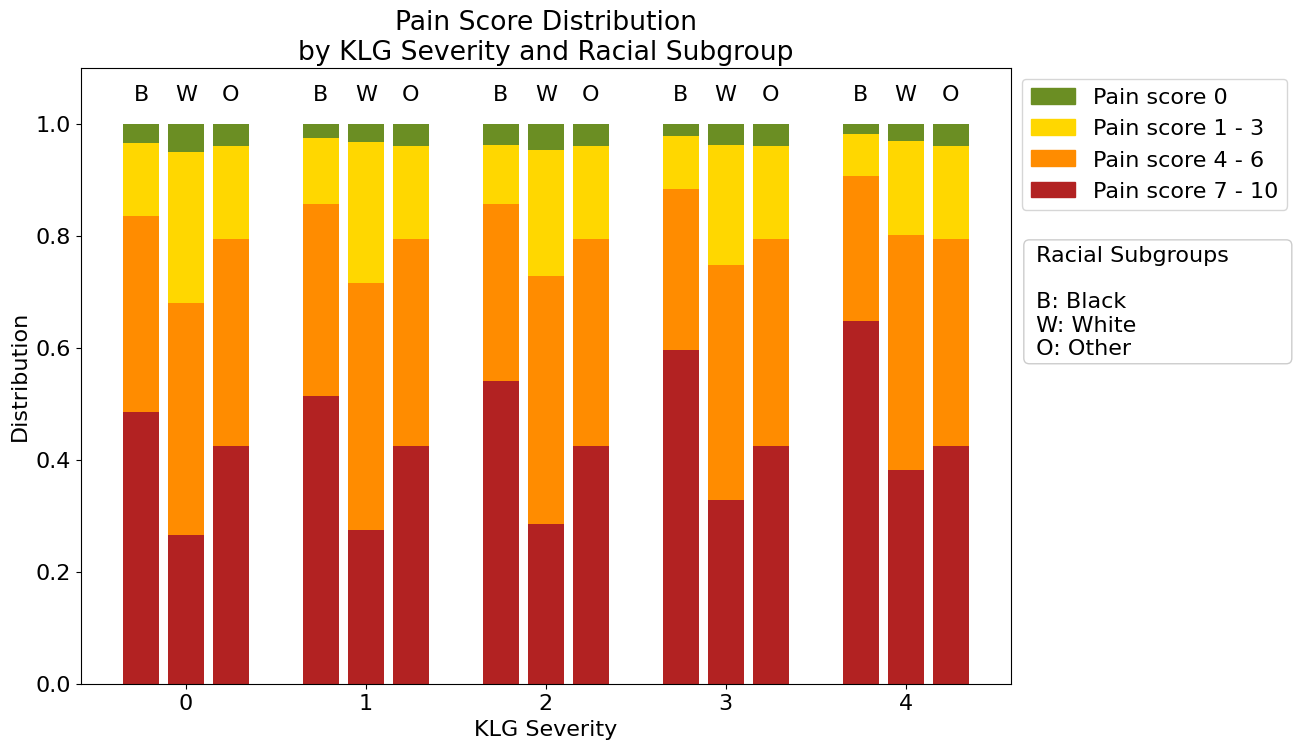

In [123]:
#colors = ['red', 'yellow', 'blue', 'green']  # Replace with your preferred colors

colors = ['firebrick', 'darkorange', 'gold', 'olivedrab']
plt.rcParams.update({'font.size': 16})  # Set the font size to 16
fig, ax = plt.subplots(figsize=(12, 8))  # Increase figsize here
fig.patch.set_facecolor('white')

group_width = num_races * (bar_width + space_between_bars) - space_between_bars  # Total width of each group of bars
group_width = 0.5

race_labels = ['B', 'W', 'O']  # Labels for each race


for klg in range(num_klg_categories):
    for race in range(num_races):
        # Starting point for each bar
        #bar_start = klg - bar_width - space_between_bars + (race + 1) * (bar_width + space_between_bars)
        bar_start = (klg - group_width / 2 + race * (bar_width + space_between_bars))
        ax.text((bar_start + bar_width / 2) - 0.1, 1.07, race_labels[race], ha='center', va='top')
        # Stacked bars
        cumulative_height = np.array(0)  # Keeps track of the height of the stack
        for pain_score in range(4):
            bar = ax.bar(bar_start, reshaped_data[klg, race, pain_score], bar_width, 
                         bottom=cumulative_height, color=colors[pain_score])
            cumulative_height = cumulative_height + reshaped_data[klg, race, pain_score]

# Labels and Titles
ax.set_xlabel('KLG Severity')
ax.set_ylabel('Distribution')
ax.set_title('Pain Score Distribution\nby KLG Severity and Racial Subgroup')
ax.set_xticks(range(num_klg_categories))
ax.set_xticklabels(range(num_klg_categories))
ax.set_ylim(0, 1.1)
# Race labels (optional)
shade_labels = ['Pain score 0', 'Pain score 1 - 3', 'Pain score 4 - 6', 'Pain score 7 - 10', 'extra']

#handles = [plt.Rectangle((0, 0), 1, 1, color='black', alpha=shade) for shade in shades]

handles = [plt.Rectangle((0, 0), 1, 1, color=colors[shade]) for shade in shades]

colors[pain_score]



# Creating the legend
ax.legend(handles[::-1], shade_labels, loc='upper left', bbox_to_anchor=(1, 1))
ax.text(1.02, 0.62, ' Racial Subgroups        \n\n B: Black\n W: White\n O: Other', transform=ax.transAxes, ha='left', va='center', fontsize=16, bbox={'facecolor': 'white', 'alpha':0.2, 'pad': 8, 'boxstyle': 'round,pad=0.25'})

plt.show()


In [153]:
demographics_df['new_race']="Other"
demographics_df['new_race'] = np.where(demographics_df['race'] == "Caucasian or White", "White", demographics_df['new_race'])
demographics_df['new_race'] = np.where(demographics_df['race'] == "African American or Black", "Black", demographics_df['new_race'])

In [154]:
left_id_list = image_df[(image_df.arthroplasty.isin(['L','B']))].id_date.tolist()
right_id_list = image_df[(image_df.arthroplasty.isin(['R','B']))].id_date.tolist()

In [155]:
right_pain_df = pain_df[pain_df.laterality=="R"]
left_pain_df = pain_df[pain_df.laterality=="L"]

In [156]:
white_list = demographics_df[demographics_df.new_race=="White"].empi_anon.unique().tolist()
black_list = demographics_df[demographics_df.new_race=="Black"].empi_anon.unique().tolist()
other_list = demographics_df[demographics_df.new_race=="Other"].empi_anon.unique().tolist()

In [157]:
left_black_arthroplasty = left_pain_df[(left_pain_df.id_date.isin(left_id_list)) & (left_pain_df.empi_anon.isin(black_list))]
right_black_arthroplasty = right_pain_df[(right_pain_df.id_date.isin(right_id_list)) & (right_pain_df.empi_anon.isin(black_list))]

left_white_arthroplasty = left_pain_df[(left_pain_df.id_date.isin(left_id_list)) & (left_pain_df.empi_anon.isin(white_list))]
right_white_arthroplasty = right_pain_df[(right_pain_df.id_date.isin(right_id_list)) & (right_pain_df.empi_anon.isin(white_list))]

left_other_arthroplasty = left_pain_df[(left_pain_df.id_date.isin(left_id_list)) & (left_pain_df.empi_anon.isin(other_list))]
right_other_arthroplasty = right_pain_df[(right_pain_df.id_date.isin(right_id_list)) & (right_pain_df.empi_anon.isin(other_list))]

left_black_no_arthroplasty = left_pain_df[(~left_pain_df.id_date.isin(left_id_list)) & (left_pain_df.empi_anon.isin(black_list))]
right_black_no_arthroplasty = right_pain_df[(~right_pain_df.id_date.isin(right_id_list)) & (right_pain_df.empi_anon.isin(black_list))]

left_white_no_arthroplasty = left_pain_df[(~left_pain_df.id_date.isin(left_id_list)) & (left_pain_df.empi_anon.isin(white_list))]
right_white_no_arthroplasty = right_pain_df[(~right_pain_df.id_date.isin(right_id_list)) & (right_pain_df.empi_anon.isin(white_list))]

left_other_no_arthroplasty = left_pain_df[(~left_pain_df.id_date.isin(left_id_list)) & (left_pain_df.empi_anon.isin(other_list))]
right_other_no_arthroplasty = right_pain_df[(~right_pain_df.id_date.isin(right_id_list)) & (right_pain_df.empi_anon.isin(other_list))]


In [158]:
black_no_arthroplasty = pd.concat([left_black_no_arthroplasty,right_black_no_arthroplasty]).reset_index(drop=True)
white_no_arthroplasty = pd.concat([left_white_no_arthroplasty,right_white_no_arthroplasty]).reset_index(drop=True)
other_no_arthroplasty = pd.concat([left_other_no_arthroplasty,right_other_no_arthroplasty]).reset_index(drop=True)
black_arthroplasty = pd.concat([left_black_arthroplasty,right_black_arthroplasty]).reset_index(drop=True)
white_arthroplasty = pd.concat([left_white_arthroplasty,right_white_arthroplasty]).reset_index(drop=True)
other_arthroplasty = pd.concat([left_other_arthroplasty,right_other_arthroplasty]).reset_index(drop=True)


In [162]:

def get_pain_score_distribution(dataframe, column='pain_score', decimal_places=3):
    pain_score_counts = dataframe[column].value_counts(normalize=True)
    pain_score_counts = pain_score_counts.reindex(range(11), fill_value=0).sort_index()
    return np.round(pain_score_counts.values, decimal_places).tolist()


[0.049, 0.024, 0.058, 0.078, 0.102, 0.135, 0.107, 0.125, 0.151, 0.065, 0.106]

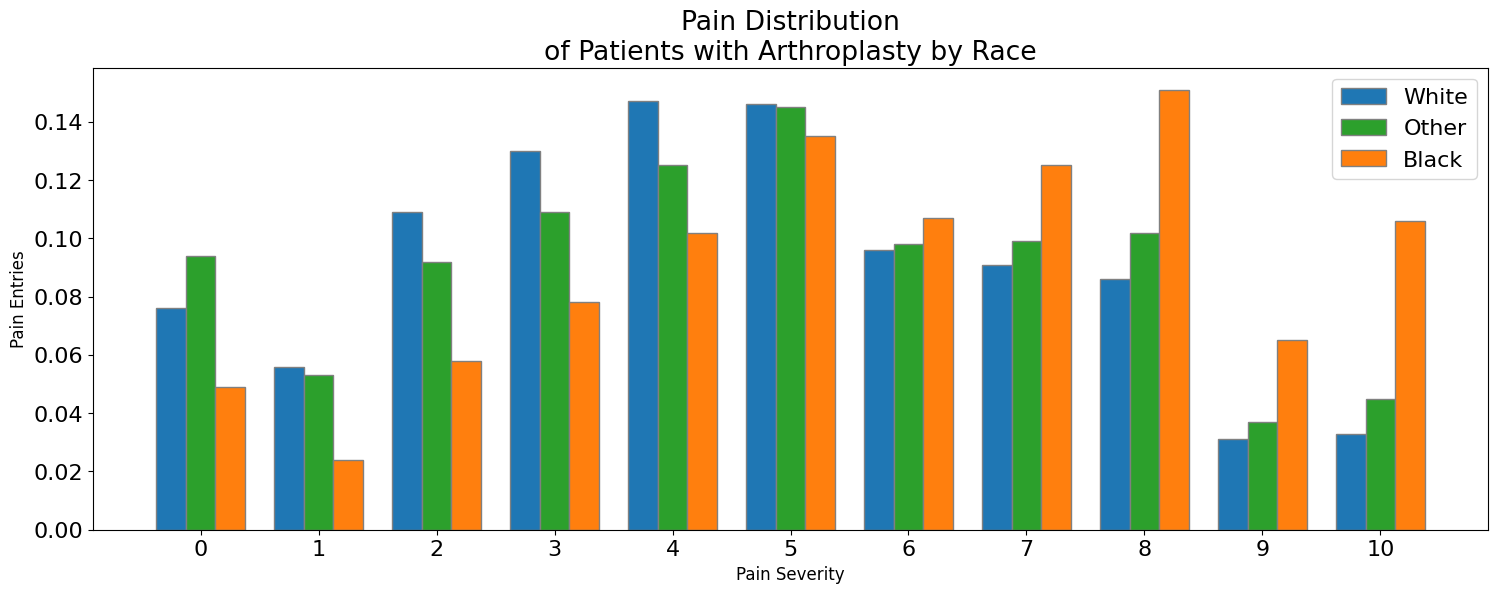

In [166]:
import numpy as np 
import matplotlib.pyplot as plt 

# set width of bar 
barWidth = 0.25
fig = plt.subplots(figsize =(18, 6)) 

# set height of bar 
Black = get_pain_score_distribution(black_no_arthroplasty)
White = get_pain_score_distribution(white_no_arthroplasty)
Other = get_pain_score_distribution(other_no_arthroplasty)
# Set position of bar on X axis 
br1 = np.arange(len(White)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 

# Make the plot
plt.bar(br1, White, color ='tab:blue', width = barWidth, edgecolor ='grey', label ='White') 
plt.bar(br2, Other, color ='tab:green', width = barWidth, edgecolor ='grey', label ='Other')
plt.bar(br3, Black, color ='tab:orange', width = barWidth, edgecolor ='grey', label ='Black') 

# Adding Xticks 
plt.xlabel('Pain Severity', fontsize = 12) 
plt.ylabel('Pain Entries', fontsize = 12) 
plt.xticks([r + barWidth for r in range(len(Black))], 
		['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

plt.title("Pain Distribution\nof Patients with Arthroplasty by Race")


plt.legend()
plt.show() 


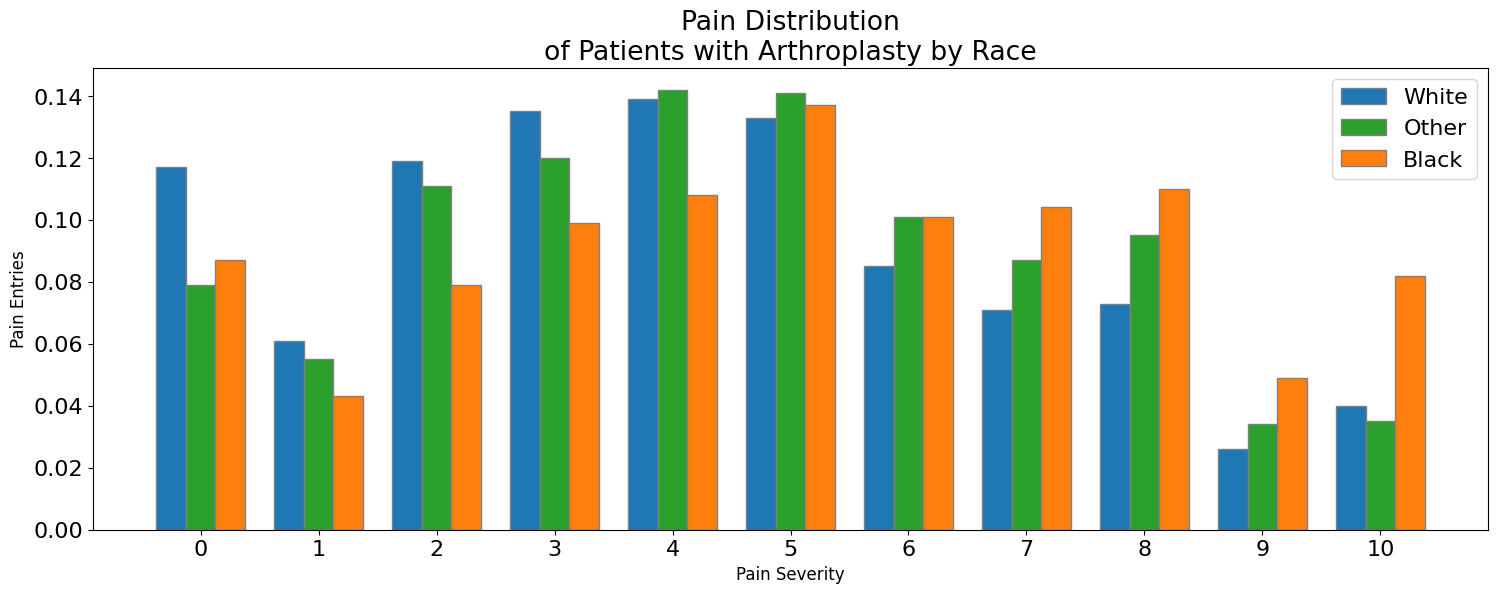

In [165]:
import numpy as np 
import matplotlib.pyplot as plt 

# set width of bar 
barWidth = 0.25
fig = plt.subplots(figsize =(18, 6)) 

# set height of bar 
Black = get_pain_score_distribution(black_arthroplasty)
White = get_pain_score_distribution(white_arthroplasty)
Other = get_pain_score_distribution(other_arthroplasty)
# Set position of bar on X axis 
br1 = np.arange(len(White)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 

# Make the plot
plt.bar(br1, White, color ='tab:blue', width = barWidth, edgecolor ='grey', label ='White') 
plt.bar(br2, Other, color ='tab:green', width = barWidth, edgecolor ='grey', label ='Other')
plt.bar(br3, Black, color ='tab:orange', width = barWidth, edgecolor ='grey', label ='Black') 

# Adding Xticks 
plt.xlabel('Pain Severity', fontsize = 12) 
plt.ylabel('Pain Entries', fontsize = 12) 
plt.xticks([r + barWidth for r in range(len(Black))], 
		['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

plt.title("Pain Distribution\nof Patients with Arthroplasty by Race")


plt.legend()
plt.show() 
